**Linear Regression:
Apply linear regression on the Boston Housing dataset with "MV" as the dependent variable. Arrive at the final dataset with reduced number of columns, utilizing p-value, correlation coefficient, and multiple R-squared statistics. Use whatever libraries are appropriate when coding in Python. Can you run the same in Excel using a data analysis function and the prepared dataset?**

In [1]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_excel('boston housing.xls')

In [3]:
print(dataset.shape)
dataset.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [4]:
dataset.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

In [5]:
X = dataset.iloc[:, :-1]
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [6]:
Y = dataset.iloc[:, -1]
Y

0      24.000000
1      21.600000
2      34.700001
3      33.400002
4      36.200001
         ...    
501    22.400000
502    20.600000
503    23.900000
504    22.000000
505    11.900000
Name: MV, Length: 506, dtype: float64

In [7]:
correlation = dataset.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


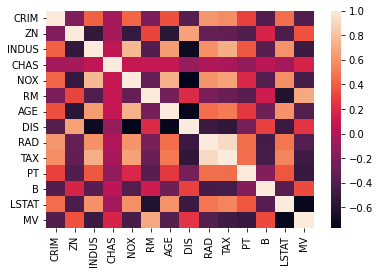

In [8]:
sns.heatmap(dataset.corr());

In [9]:
# Statsmodels.OLS requires us to add a constant.
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     MV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Thu, 26 Jan 2023   Prob (F-statistic):                        0.00
Time:                        03:08:20   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [10]:
X=X[['RM','LSTAT','PT','TAX']]
X

,RM,LSTAT,PT,TAX
0,6.575,4.98,15.300000,296
1,6.421,9.14,17.799999,242
2,7.185,4.03,17.799999,242
3,6.998,2.94,18.700001,222
4,7.147,5.33,18.700001,222
...,...,...,...,...
501,6.593,9.67,21.000000,273
502,6.120,9.08,21.000000,273
503,6.976,5.64,21.000000,273
504,6.794,6.48,21.000000,273


In [11]:
model = sm.OLS(Y,X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     MV   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              2518.
Date:                Thu, 26 Jan 2023   Prob (F-statistic):                        0.00
Time:                        03:08:20   Log-Likelihood:                         -1562.0
No. Observations:                 506   AIC:                                      3132.
Df Residuals:                     502   BIC:                                      3149.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.6)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(202, 4)
(202,)
(304, 4)
(304,)


In [14]:
from sklearn import linear_model
regression_model=linear_model.LinearRegression()

In [15]:
regression_model.fit(X_train, y_train)

LinearRegression()

In [16]:
Y_Pred = regression_model.predict(X_test)
print('Coefficients:',regression_model.coef_, 'R2 Score:',regression_model.score(X, Y))

Coefficients: [ 3.75943207e+00 -7.38079408e-01 -7.95325669e-01  3.11010187e-03] R2 Score: 0.6666960243629019


In [17]:
results = pd.DataFrame()


In [18]:
results['Y_test'] = y_test
results

,Y_test
141,14.400000
133,18.400000
499,17.500000
407,27.900000
281,35.400002
...,...
91,22.000000
446,14.900000
455,14.100000
321,23.100000


In [19]:
results['Predicted Results'] = Y_Pred
results

,Y_test,Predicted Results
141,14.400000,-0.472401
133,18.400000,16.850402
499,17.500000,17.295185
407,27.900000,19.693851
281,35.400002,33.187479
...,...,...
91,22.000000,26.267955
446,14.900000,18.271986
455,14.100000,18.712776
321,23.100000,25.761860


In [20]:
from sklearn.metrics import r2_score
print("Proportion of variance: %.2f" % r2_score(y_test, Y_Pred))

Proportion of variance: 0.67


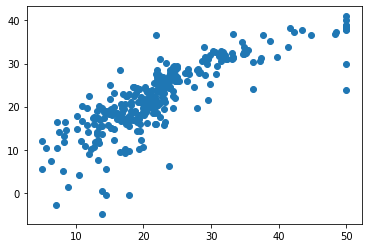

In [21]:
import matplotlib.pyplot as plt
plt.scatter(y_test, Y_Pred) 
plt.show()